In [28]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import warnings,datetime,os,calendar,csv

import tensorflow as tf
import pandas as pd
import seaborn as sns

from keras.models import Model,Sequential
from keras.layers import Dense,LSTM,Conv2D,Dropout,BatchNormalization,Input,Concatenate,Add,Activation,MaxPooling2D,AveragePooling2D
import keras.backend as K

from sklearn import preprocessing as pp

from sklearn.cluster import KMeans,MeanShift,DBSCAN
from sklearn.dummy import DummyClassifier,DummyRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import BayesianRidge,Lasso,LinearRegression,SGDClassifier,SGDRegressor
from sklearn.mixture import BayesianGaussianMixture,GaussianMixture
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,RadiusNeighborsClassifier,RadiusNeighborsRegressor,NearestNeighbors
from sklearn.manifold import Isomap,TSNE
from sklearn.model_selection import KFold,StratifiedKFold,train_test_split
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.neural_network import BernoulliRBM,MLPClassifier,MLPRegressor
from sklearn.decomposition import FactorAnalysis,KernelPCA,PCA,MiniBatchSparsePCA,FastICA
from sklearn.preprocessing import CategoricalEncoder,KBinsDiscretizer,LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler

from xgboost import XGBClassifier,XGBRegressor
import gym

import pickle,h5py,json
import urllib
from bs4 import BeautifulSoup

import pygame
from pygame.locals import *

warnings.filterwarnings('ignore')
sns.set()
plt.xkcd()

In [50]:
df = pd.read_csv('Data\\countries_of_the_world.csv')

for col in df.select_dtypes(include=['object']).drop(['Country','Region'],axis=1).columns:
    df[col]=df[col].apply(lambda x: str(x).replace(',','.'))

for col in df.select_dtypes(include=['object']).drop(['Country','Region'],axis=1).columns:
    df[col]=df[col].astype('float')

df=df.set_index('Country',drop=True)
dict_region=dict(enumerate(df['Region'].astype('category').cat.categories))
df['Region']=df['Region'].astype('category').cat.codes

df['Literacy (%)']=df['Literacy (%)'].fillna(df['Literacy (%)'].min())
df['Climate']=df['Climate'].fillna(df['Climate'].mean())
df['Agriculture']=df['Agriculture'].fillna(df['Agriculture'].min())
df['Industry']=df['Industry'].fillna(df['Industry'].min())
df['Service']=df['Service'].fillna(df['Service'].min())
df['Deathrate']=df['Deathrate'].fillna(df['Deathrate'].max())
df['Net migration']=df['Net migration'].fillna(df['Net migration'].mean())
df['Arable (%)']=df['Arable (%)'].fillna(df['Arable (%)'].min())
df['Crops (%)']=df['Crops (%)'].fillna(df['Crops (%)'].min())
df['Other (%)']=df['Other (%)'].fillna(df['Other (%)'].min())
df['Infant mortality (per 1000 births)']=df['Infant mortality (per 1000 births)'].fillna(df['Infant mortality (per 1000 births)'].max())
df['Birthrate']=df['Birthrate'].fillna(df['Birthrate'].max())
df['GDP ($ per capita)']=df['GDP ($ per capita)'].fillna(df['GDP ($ per capita)'].max())
df['Phones (per 1000)']=df['Phones (per 1000)'].fillna(df['Phones (per 1000)'].mean())

dfo = df.copy()

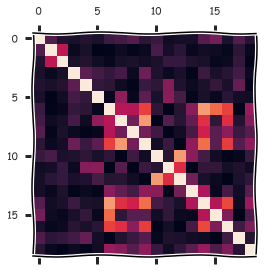

In [51]:
plt.matshow(df.corr().abs())

In [54]:
km = KMeans()
km_class = km.fit_predict(df.values)
df['KMeans Class'] = km_class

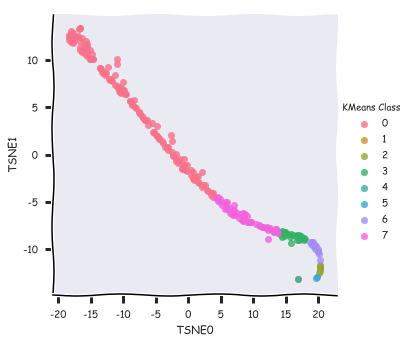

In [55]:
tsne = TSNE()
tsne_comp = TSNE().fit_transform(df.values)

df['TSNE0'] = tsne_comp[:,0]
df['TSNE1'] = tsne_comp[:,1]

sns.lmplot(x='TSNE0',y='TSNE1',data=df,hue='KMeans Class',fit_reg=False)
plt.show()

In [56]:
df.loc['Germany ']

Region                                1.000000e+01
Population                            8.242230e+07
Area (sq. mi.)                        3.570210e+05
Pop. Density (per sq. mi.)            2.309000e+02
Coastline (coast/area ratio)          6.700000e-01
Net migration                         2.180000e+00
Infant mortality (per 1000 births)    4.160000e+00
GDP ($ per capita)                    2.760000e+04
Literacy (%)                          9.900000e+01
Phones (per 1000)                     6.679000e+02
Arable (%)                            3.385000e+01
Crops (%)                             5.900000e-01
Other (%)                             6.556000e+01
Climate                               3.000000e+00
Birthrate                             8.250000e+00
Deathrate                             1.062000e+01
Agriculture                           9.000000e-03
Industry                              2.960000e-01
Service                               6.950000e-01
KMeans Class                   

In [63]:
dfo[df['KMeans Class']==0]

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Albania,3,3581655,28748,124.6,1.26,-4.930000,21.52,4500.0,86.5,71.200000,21.09,4.42,74.49,3.000000,15.11,5.22,0.232,0.188,0.579
American Samoa,8,57794,199,290.4,58.29,-20.710000,9.27,8000.0,97.0,259.500000,10.00,15.00,75.00,2.000000,22.46,3.27,0.000,0.020,0.062
Andorra,10,71201,468,152.1,0.00,6.600000,4.05,19000.0,100.0,497.200000,2.22,0.00,97.78,3.000000,8.71,6.25,0.000,0.020,0.062
Anguilla,4,13477,102,132.1,59.80,10.760000,21.03,8600.0,95.0,460.000000,0.00,0.00,100.00,2.000000,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,4,69108,443,156.0,34.54,-6.150000,19.46,11000.0,89.0,549.900000,18.18,4.55,77.27,2.000000,16.93,5.37,0.038,0.220,0.743
Armenia,2,2976372,29800,99.9,0.00,-6.470000,23.28,3500.0,98.6,195.700000,17.55,2.30,80.15,4.000000,12.07,8.23,0.239,0.343,0.418
Aruba,4,71891,193,372.5,35.49,0.000000,5.89,28000.0,97.0,516.100000,10.53,0.00,89.47,2.000000,11.03,6.68,0.004,0.333,0.663
"Bahamas, The",4,303770,13940,21.8,25.41,-2.200000,25.21,16700.0,95.6,460.600000,0.80,0.40,98.80,2.000000,17.57,9.05,0.030,0.070,0.900
Bahrain,5,698585,665,1050.5,24.21,1.050000,17.27,16900.0,89.1,281.300000,2.82,5.63,91.55,1.000000,17.80,4.14,0.005,0.387,0.608
